<a href="https://colab.research.google.com/github/RayyanNasution/Assignment/blob/main/PYTN_Assgn_3_batch_3_Muhammat_Rayyan_Nasution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ASSIGNMENT 3 [CLASSIFICATION II]

Muhammat Rayyan Nasution_PYTN-KS08-015

## IMPORT PUSTAKA

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, normalize, StandardScaler
from sklearn import metrics
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## LOAD DATASET

In [2]:
# Membaca File
from google.colab import drive
drive.mount('/content/drive/')
df = pd.read_csv("drive/MyDrive/H8/bank-additional-full.csv", sep=';')


Mounted at /content/drive/


In [3]:
df.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
df.rename(columns={"default":"credit", "y":"subscribed"}, inplace=True)

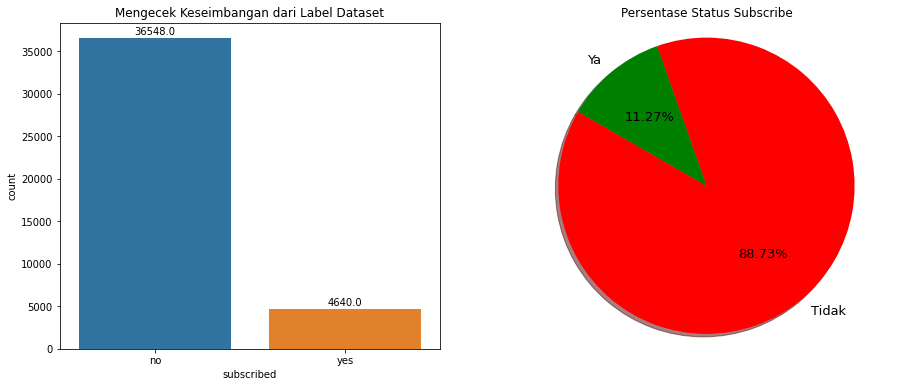

In [8]:
# Mengecek keseimbangan jumlah label/output dataset
plt.rcParams['figure.figsize']=(15,6)
plt.subplot(121)
plt.title("Mengecek Keseimbangan dari Label Dataset")
ax = sns.countplot(x='subscribed', data=df)
for i in ax.patches:
    ax.annotate(format(i.get_height(),'0.1f'), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center', va='center', xytext=(0,7), textcoords='offset points')
    
plt.subplot(122)
plt.title("Persentase Status Subscribe")
subscribed_values_count = df['subscribed'].value_counts()
subscribed_size = subscribed_values_count.values.tolist()
subscribed_labels = 'Tidak', 'Ya'
colors=['red', 'green']
pcs, texts, autotexts = plt.pie(subscribed_size, labels=subscribed_labels, colors=colors,
                             autopct='%2.2f%%', shadow=True, startangle=150)

for text, autotext in zip(texts, autotexts):
    text.set_fontsize(13)
    autotext.set_fontsize(13)

plt.axis('equal')
plt.show()

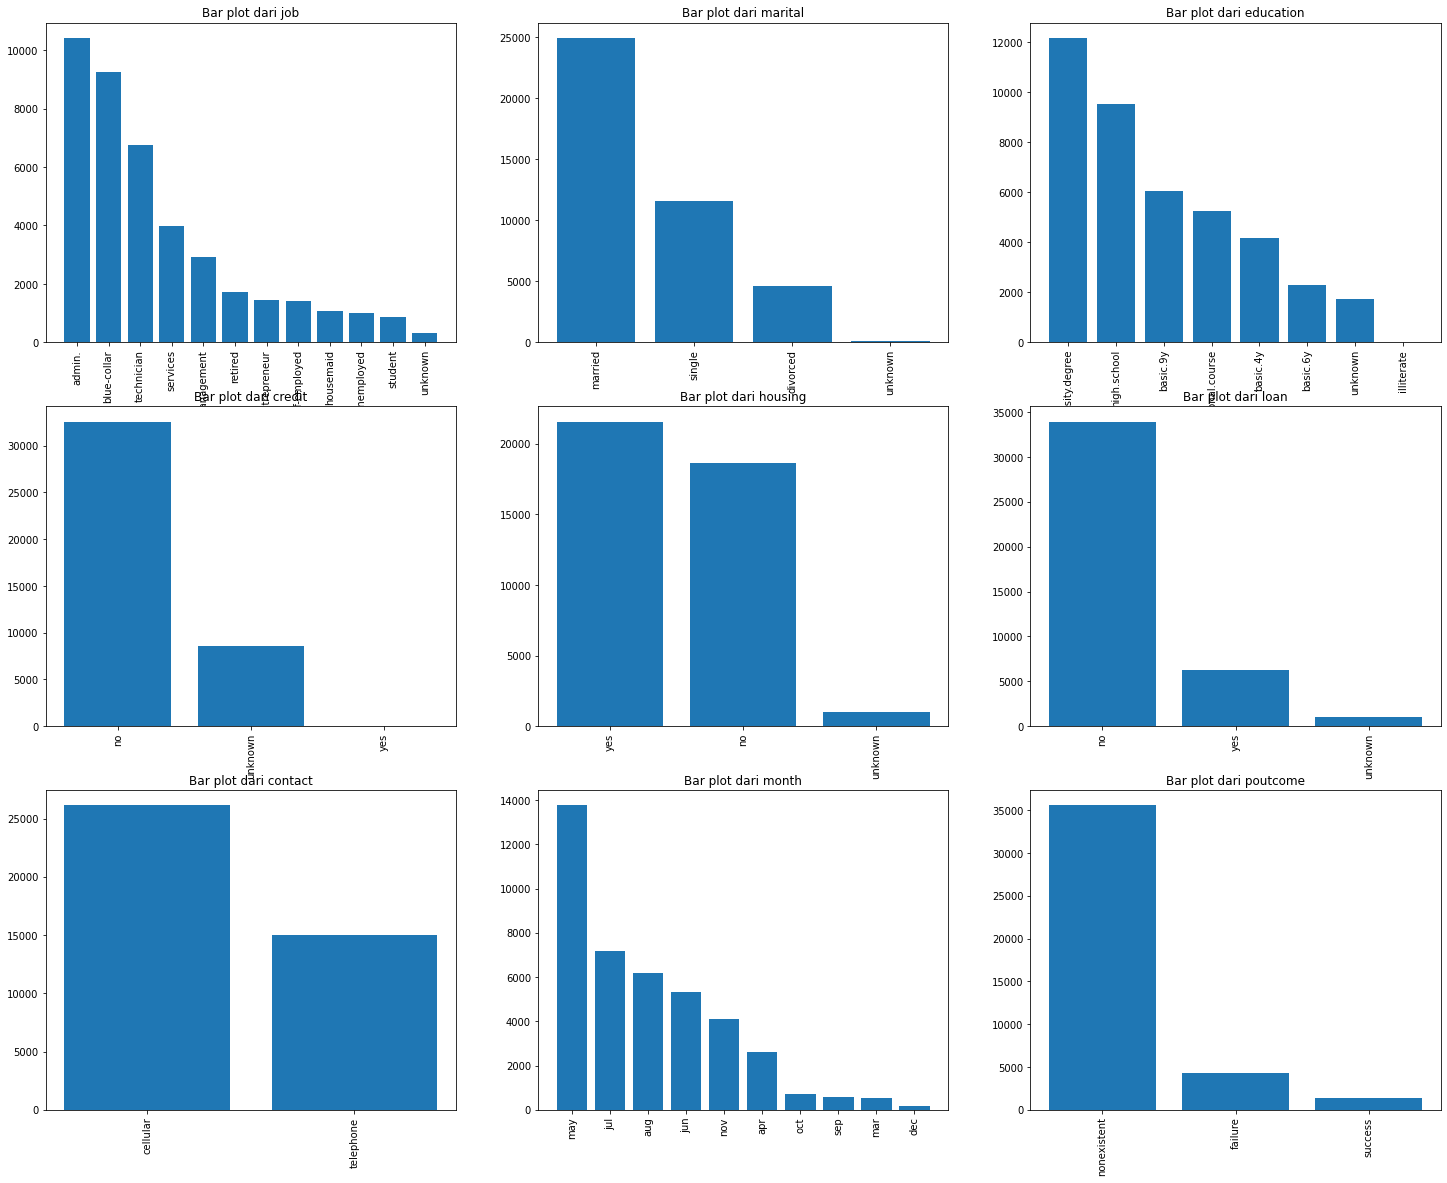

In [9]:
# Eksplor Kolom Kategorikal

categorical_cols = ['job','marital','education','credit','housing',
                   'loan','contact','month','poutcome']
fig, ax = plt.subplots(3,3, sharex=False, sharey=False, figsize=(25,20))
count = 0
for cat_col in categorical_cols:
    value_count = df[cat_col].value_counts()
    ax_x = count//3
    ax_y = count%3
    x_range = np.arange(0, len(value_count))
    ax[ax_x, ax_y].bar(x_range, value_count.values, tick_label=value_count.index)
    ax[ax_x, ax_y].set_title(f"Bar plot dari {cat_col}")
    
    for i in ax[ax_x, ax_y].get_xticklabels():
        i.set_rotation(90)
    
    count+=1
plt.show()

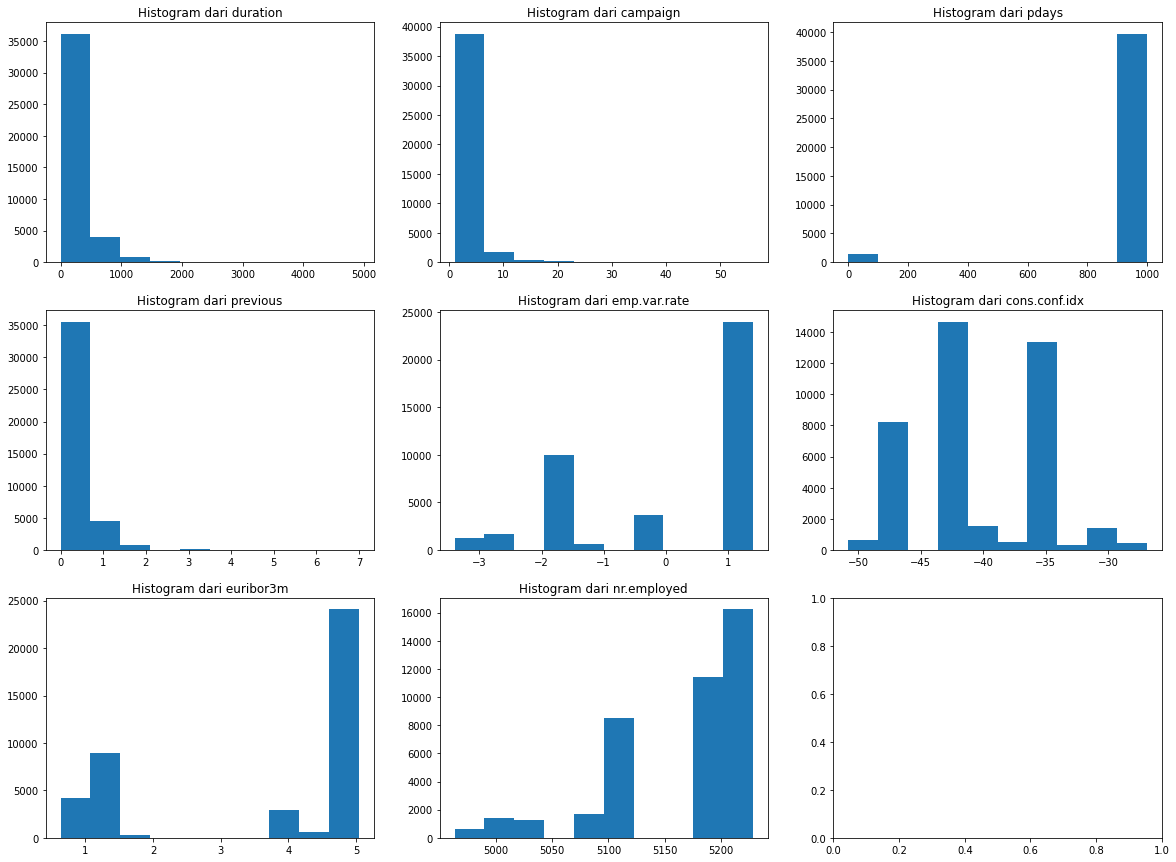

In [10]:
# Eksplor Kolom Numerikal
num_cols = ['duration','campaign','pdays','previous','emp.var.rate',
            'cons.conf.idx','euribor3m','nr.employed']

fig, ax = plt.subplots(3,3, sharex=False, sharey=False, figsize=(20,15))
count = 0
for num_col in num_cols:
    ax_x = count//3
    ax_y = count%3
    
    ax[ax_x, ax_y].hist(df[num_col])
    ax[ax_x, ax_y].set_title(f"Histogram dari {num_col}")
    count+=1
plt.show()

In [11]:
# Mengganti value yes dengan 1 dan no dengan 0
df['subscribed'].replace({'yes':1, 'no':0}, inplace=True)

In [12]:
corr = df.corr()
print(corr['subscribed'].sort_values(axis=0, ascending=True))

nr.employed      -0.354678
pdays            -0.324914
euribor3m        -0.307771
emp.var.rate     -0.298334
cons.price.idx   -0.136211
campaign         -0.066357
age               0.030399
cons.conf.idx     0.054878
previous          0.230181
duration          0.405274
subscribed        1.000000
Name: subscribed, dtype: float64


In [13]:
# Drop features yang memiliki korelasi lebih sedikit dan tidak relevan dengan proses klasifikasi
df.drop(columns=['nr.employed','pdays','euribor3m','emp.var.rate',
    'cons.price.idx','day_of_week','cons.conf.idx','contact','month'],axis=0, inplace=True)
df

,age,job,marital,education,credit,housing,loan,duration,campaign,previous,poutcome,subscribed
0,56,housemaid,married,basic.4y,no,no,no,261,1,0,nonexistent,0
1,57,services,married,high.school,unknown,no,no,149,1,0,nonexistent,0
2,37,services,married,high.school,no,yes,no,226,1,0,nonexistent,0
3,40,admin.,married,basic.6y,no,no,no,151,1,0,nonexistent,0
4,56,services,married,high.school,no,no,yes,307,1,0,nonexistent,0
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,334,1,0,nonexistent,1
41184,46,blue-collar,married,professional.course,no,no,no,383,1,0,nonexistent,0
41185,56,retired,married,university.degree,no,yes,no,189,2,0,nonexistent,0
41186,44,technician,married,professional.course,no,no,no,442,1,0,nonexistent,1


In [14]:
encoder = LabelEncoder()
col = ['marital','credit','housing','loan']

for i in col:
    df[i] = encoder.fit_transform(df[i])

In [15]:
# Encoding
cat_features = ['job','marital','education','credit','housing','loan','poutcome']
df = pd.get_dummies(df, columns=cat_features, drop_first=True)
df

,age,duration,campaign,previous,subscribed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,education_university.degree,education_unknown,credit_1,credit_2,housing_1,housing_2,loan_1,loan_2,poutcome_nonexistent,poutcome_success
0,56,261,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,57,149,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,37,226,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,40,151,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,56,307,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
41184,46,383,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
41185,56,189,2,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
41186,44,442,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
# Assign variable features dan label
X = df.drop(columns='subscribed', axis=1).values
y = df['subscribed'].values

In [17]:
# Splitting data scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=103)

In [18]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [19]:
# Logistik Regression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
ypred1 = model_lr.predict(X_test)

print(metrics.classification_report(y_test, ypred1))
print("Akurasi : ",metrics.accuracy_score(y_test, ypred1))
print("Confusion Matrix :",'\n',metrics.confusion_matrix(y_test, ypred1))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10969
           1       0.67      0.35      0.46      1388

    accuracy                           0.91     12357
   macro avg       0.80      0.66      0.70     12357
weighted avg       0.89      0.91      0.89     12357

Akurasi :  0.9076636724123979
Confusion Matrix : 
 [[10731   238]
 [  903   485]]


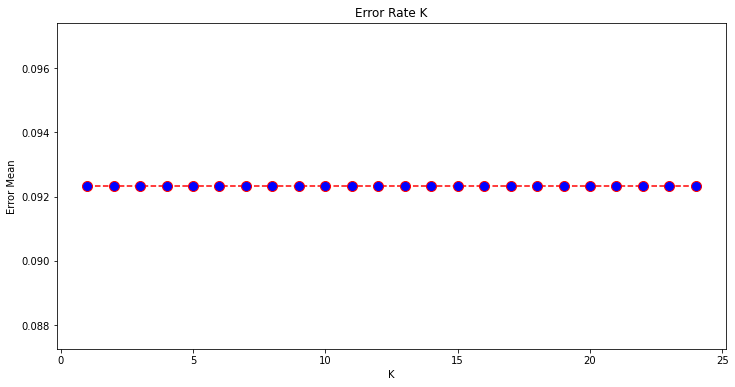

In [20]:
error = []

for i in range (1,25):
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    error.append(np.mean(pred != y_test))
    
plt.figure(figsize=(12,6));
plt.plot(range(1,25), error, color='red', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=10);
plt.title('Error Rate K');
plt.xlabel('K');
plt.ylabel('Error Mean');

In [21]:
# K-Nearest Neighbor (KNN)
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier()
kNN.fit(X_train, y_train)
ypred2=kNN.predict(X_test)

print(metrics.classification_report(y_test, ypred2))
print("Akurasi : ", metrics.accuracy_score(y_test, ypred2))
print("Confusion Matrix :",'\n',metrics.confusion_matrix(y_test, ypred2))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     10969
           1       0.56      0.29      0.39      1388

    accuracy                           0.90     12357
   macro avg       0.74      0.63      0.66     12357
weighted avg       0.88      0.90      0.88     12357

Akurasi :  0.8951201747997086
Confusion Matrix : 
 [[10654   315]
 [  981   407]]


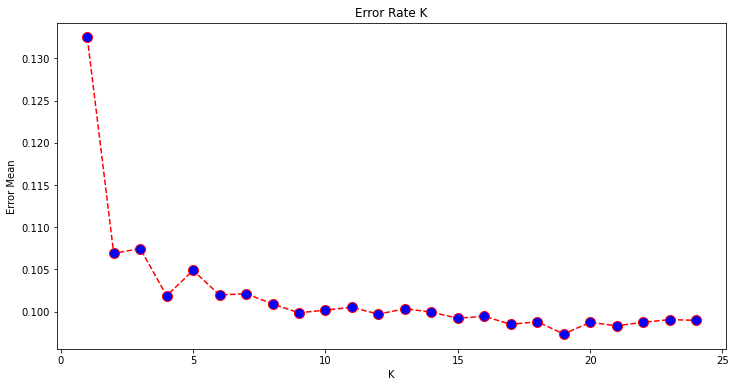

In [22]:
error = []

for i in range (1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12,6));
plt.plot(range(1,25), error, color='red', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=10);
plt.title('Error Rate K');
plt.xlabel('K');
plt.ylabel('Error Mean');

In [23]:
# Support Vector Machines (SVM)
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
ypred3=svm_model.predict(X_test)

print(metrics.classification_report(y_test, ypred3))
print("Akurasi : ", metrics.accuracy_score(y_test, ypred3))
print("Confusion Matrix :",'\n',metrics.confusion_matrix(y_test, ypred3))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10969
           1       0.68      0.26      0.37      1388

    accuracy                           0.90     12357
   macro avg       0.80      0.62      0.66     12357
weighted avg       0.89      0.90      0.88     12357

Akurasi :  0.902889050740471
Confusion Matrix : 
 [[10801   168]
 [ 1032   356]]


ValueError: ignored

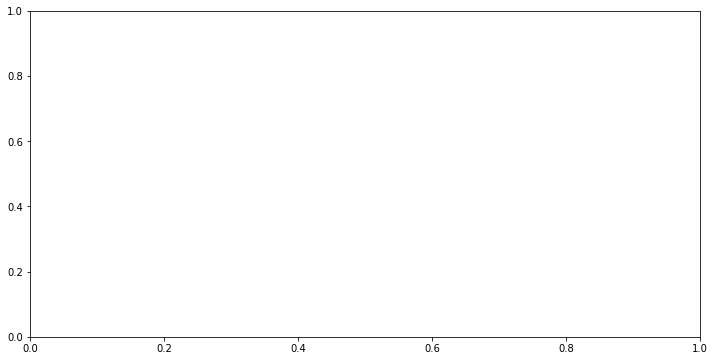

In [24]:
for i in range (1,25):
    svm_model = svm.SVC()
    svm_model.fit(X_train, y_train)
    ypred3=svm_model.predict(X_test)
    error.append(np.mean(ypred3 != y_test))
    
plt.figure(figsize=(12,6));
plt.plot(range(1,25), error, color='red', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=10);
plt.title('Error Rate K');
plt.xlabel('K');
plt.ylabel('Error Mean');

In [25]:
# Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
ypred4=dt.predict(X_test)

print(metrics.classification_report(y_test, ypred4))
print("Akurasi : ", metrics.accuracy_score(y_test, ypred4))
print("Confusion Matrix :",'\n',metrics.confusion_matrix(y_test, ypred4))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     10969
           1       0.39      0.43      0.41      1388

    accuracy                           0.86     12357
   macro avg       0.66      0.67      0.67     12357
weighted avg       0.87      0.86      0.86     12357

Akurasi :  0.8616978230962208
Confusion Matrix : 
 [[10046   923]
 [  786   602]]


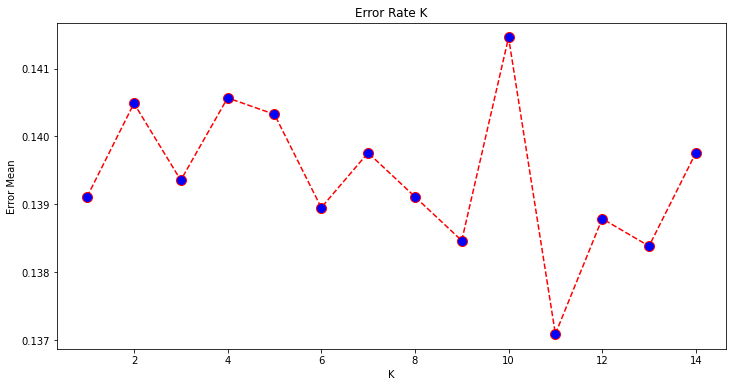

In [26]:
error = []

for i in range (1,15):
    dt = tree.DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    ypred4=dt.predict(X_test)
    error.append(np.mean(ypred4 != y_test))
    
plt.figure(figsize=(12,6));
plt.plot(range(1,15), error, color='red', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=10);
plt.title('Error Rate K');
plt.xlabel('K');
plt.ylabel('Error Mean');

In [27]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
ypred5=rf.predict(X_test)

print(metrics.classification_report(y_test, ypred5))
print("Akurasi : ", metrics.accuracy_score(y_test, ypred5))
print("Confusion Matrix :",'\n',metrics.confusion_matrix(y_test, ypred5))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     10969
           1       0.59      0.37      0.46      1388

    accuracy                           0.90     12357
   macro avg       0.75      0.67      0.70     12357
weighted avg       0.89      0.90      0.89     12357

Akurasi :  0.8998947964716355
Confusion Matrix : 
 [[10603   366]
 [  871   517]]


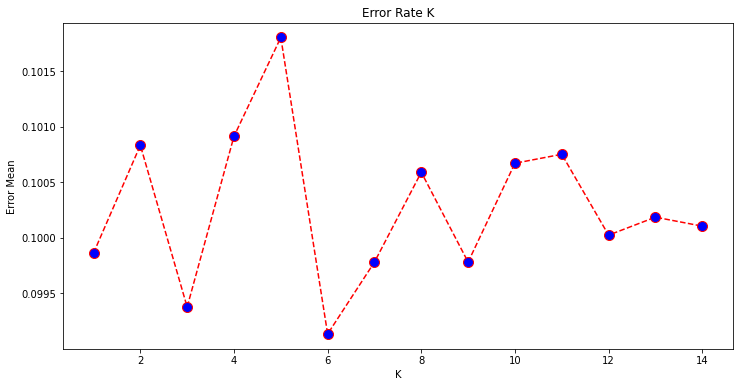

In [28]:
error = []

for i in range (1,15):
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train, y_train)
    ypred5=rf.predict(X_test)
    error.append(np.mean(ypred5 != y_test))
    
plt.figure(figsize=(12,6));
plt.plot(range(1,15), error, color='red', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=10);
plt.title('Error Rate K');
plt.xlabel('K');
plt.ylabel('Error Mean');

In [29]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
ypred6=nb.predict(X_test)

print(metrics.classification_report(y_test, ypred6))
print("Akurasi : ", metrics.accuracy_score(y_test, ypred6))
print("Confusion Matrix :",'\n',metrics.confusion_matrix(y_test, ypred6))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10969
           1       0.00      0.00      0.00      1388

    accuracy                           0.89     12357
   macro avg       0.44      0.50      0.47     12357
weighted avg       0.79      0.89      0.83     12357

Akurasi :  0.8876750020231448
Confusion Matrix : 
 [[10969     0]
 [ 1388     0]]


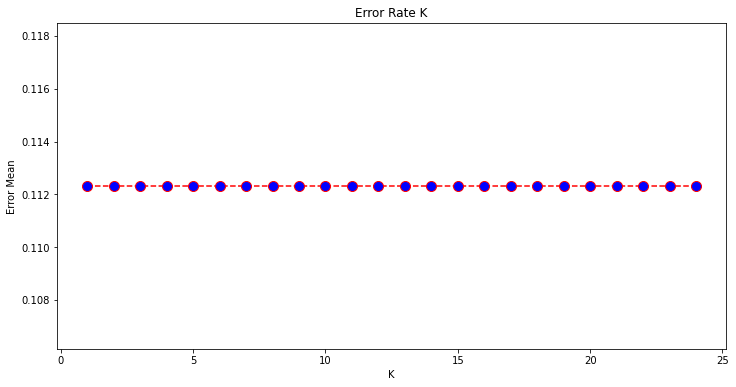

In [30]:
error = []

for i in range (1,25):
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    ypred6=nb.predict(X_test)
    error.append(np.mean(ypred6 != y_test))
    
plt.figure(figsize=(12,6));
plt.plot(range(1,25), error, color='red', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=10);
plt.title('Error Rate K');
plt.xlabel('K');
plt.ylabel('Error Mean');

In [31]:

print("Logistic Regression : ", metrics.accuracy_score(y_test, ypred1))
print("K-Nearest Neighbor (KNN) : ", metrics.accuracy_score(y_test, ypred2))
print("Support Vector Machines (SVM) : ", metrics.accuracy_score(y_test, ypred3))
print("Decision Tree : ", metrics.accuracy_score(y_test, ypred4))
print("Random Forest : ", metrics.accuracy_score(y_test, ypred5))
print("Naive Bayes : ", metrics.accuracy_score(y_test, ypred6))

Logistic Regression :  0.9076636724123979
K-Nearest Neighbor (KNN) :  0.8951201747997086
Support Vector Machines (SVM) :  0.902889050740471
Decision Tree :  0.8602411588573279
Random Forest :  0.8998947964716355
Naive Bayes :  0.8876750020231448


In [32]:
# Simpan hasil test dalam file .csv
predictions = pd.DataFrame(ypred1, columns=
                          ['predictions']).to_csv('H8_LR_Bank.csv')